# 6.2 作为量子仿真的量子搜索

## 练习 6.7

:::{admonition} 练习 6.7

验证图 6.4 和图 6.5 所示线路分别实现运算 $e^{- i |x\rangle \langle x| \Delta t}$ 和 $e^{- i |\psi\rangle \langle\psi| \Delta t}$，其中 $|\psi\rangle$ 如式 (6.24) 所示：

$$
|\psi\rangle = \frac{\sum_a |a\rangle}{\sqrt{N}}
\tag{6.24}
$$

图 6.4

![ex-6.7.1](assets/ex-6.7.1.svg)

图 6.5

![ex-6.7.2](assets/ex-6.7.2.svg)

:::

:::{warning}

这道题可能有一些表述不当或错误。

- 式 (6.24) 的求和对象是 $a$ 而非原书中的 $x$；因为在上下文中，$|x\rangle$ 已经用来表示解了，因此用于表示均匀叠加态的求和指标应当用其它记号比较好。
- 图中的相位门的符号可能是错的，这在很多讨论中已经发现 ([serab.net 的解答](https://serab.net/docs/qcqi/chapter6/#67)、Stack Exchange 的讨论 [1](https://quantumcomputing.stackexchange.com/a/11965/14843) 与 [2](https://quantumcomputing.stackexchange.com/a/11860/14843))。因此，我们这里也采用经过修正的相位。
- 我们修改了代入线路的初始状态为 $|\phi\rangle |0\rangle$。原来的书中是 $|y\rangle |0\rangle$，但我认为不太合适，因为 $|y\rangle$ 已经用来表示非解了。

:::

**图 6.4 证明 (1) 指数算符的简化**

以 $\Delta t$ 作为小量进行 Taylor 展开：

$$
\begin{align*}
e^{- i |x\rangle \langle x| \Delta t} &= \sum_{k=0}^\infty \frac{1}{k!} (- i |x\rangle \langle x| \Delta t)^k \\
&= \sum_{k=0}^\infty \frac{1}{k!} (-i \Delta t)^k (|x\rangle\langle x|)^k
\end{align*}
$$

我们回顾到$|x\rangle \langle x|$、$|\psi\rangle \langle\psi|$ 等外积算符是投影算符。因此，它满足幂等性，即 $( |x\rangle \langle x| )^2 = |x\rangle \langle x|$。幂等性的推广可以是，若 $k \geqslant 1$ 且为整数，那么 $(|x\rangle\langle x|)^k = |x\rangle\langle x|$。因此，上式的求和可以化为

$$
\begin{align*}
e^{- i |x\rangle \langle x| \Delta t}
&= |x\rangle\langle x| \sum_{k=1}^\infty \frac{1}{k!} (-i \Delta t)^k + I \\
&= |x\rangle\langle x| \sum_{k=0}^\infty \frac{1}{k!} (-i \Delta t)^k + I - |x\rangle \langle x| \\
&= I - |x\rangle \langle x| + e^{- i \Delta t} |x\rangle \langle x|
\end{align*}
$$

最后，由于 $|x\rangle$ 与 $|y\rangle$ 在整个空间互补，因此 $|x\rangle \langle x| + |y\rangle \langle y| = I$。进而，

$$
e^{- i |x\rangle \langle x| \Delta t} = |y\rangle \langle y| + e^{- i \Delta t} |x\rangle \langle x|
$$

我们最后考察一下 $e^{- i |x\rangle \langle x| \Delta t}$ 算符作用在 $|\phi\rangle = \alpha |x\rangle + \beta |y\rangle$ 上的结果 (留意到因为 $|x\rangle$ 是解态而 $|y\rangle$ 是非解态，因此两者正交即 $\langle x|y\rangle = 0$)：

$$
\begin{align*}
e^{- i |x\rangle \langle x| \Delta t} |\phi\rangle &= \big( |y\rangle \langle y| + e^{- i \Delta t} |x\rangle \langle x| \big) \big( \alpha |x\rangle + \beta |y\rangle \big) \\
&= \alpha e^{- i \Delta t} |x\rangle + \beta |y\rangle
\end{align*}
$$

**图 6.4 证明 (2) 线路图**

![ex-6.7.3](assets/ex-6.7.3.svg)

我们仍旧与以前一样，通过每个门路之后，考察线路的态的行为。

$$
|\psi_0\rangle = \big( \alpha |x\rangle + \beta |y\rangle \big) |0\rangle
$$

对于 orcale 过程，若代入的是问题的解 (即 $|x\rangle$)，则互换 orcale 工作空间比特的 $|0\rangle$ 与 $|1\rangle$；但若不是问题的解 (即 $|y\rangle$)，那么不作变换。因此，

$$
|\psi_1\rangle = \alpha |x\rangle |1\rangle + \beta |y\rangle |0\rangle
$$

对于最末的相位过程，若代入的是 $|0\rangle$ 则不作变换；若代入的是 $|1\rangle$ 则加以相位 $e^{i \Delta t}$。因此，

$$
|\psi_2\rangle = \alpha e^{-i \Delta t} |x\rangle |1\rangle + \beta |y\rangle |0\rangle
$$

最后再用一次 orcale 过程：

$$
|\psi_3\rangle = \alpha e^{-i \Delta t} |x\rangle |0\rangle + \beta |y\rangle |0\rangle = \big( \alpha e^{-i \Delta t} |x\rangle + \beta |y\rangle \big) |0\rangle
$$

我们发现这个结果中，除去 orcale 工作量子比特，其余部分与 $e^{- i |x\rangle \langle x| \Delta t} |\phi\rangle$ 结果一致。

**图 6.5 证明 (1) 指数算符的简化**

与之前的计算过程非常类似地，我们可以得到图 6.5 待证的算符是

$$
e^{- i |\psi\rangle \langle\psi| \Delta t} = I + (e^{- i \Delta t} - 1) |\psi\rangle \langle\psi|
$$

但在图 6.5 的证明中，比较方便的做法是直接使用数学推演，而非使用线路结果。我们提前需要表明，作为均匀叠加态，

$$
H^{\otimes n} |0\rangle = |\psi\rangle
$$

**图 6.5 证明 (2) 线路图**

我们令相位门 $P_{- i \Delta t} = \begin{bmatrix} 1 & 0 \\ 0 & e^{- i \Delta t} \end{bmatrix}$，那么图 6.5 的线路中存有三种门路：Hadamard 门 $H^{\otimes n} \otimes I$、受控非门 $I^{\otimes n} \otimes I - |0\rangle\langle0| \otimes (I-X)$、相位门 $I^{\otimes n} \otimes P_{-i \Delta t}$。其中，受控非门的 $|0\rangle\langle0|$ 表示的是 $n$ 量子比特态的投影算符，而非单量子比特投影算符。我们依次作计算；首先是第一个 (Hadamard 门)、第二个 (受控非门) 算符作用：

$$
\begin{align*}
&\quad \big( I^{\otimes n} \otimes I - |0\rangle\langle0| \otimes (I-X) \big) \big( H^{\otimes n} \otimes I \big) \\
&= H^{\otimes n} \otimes I - |0\rangle\langle0| H^{\otimes n} \otimes (I-X) \\
&= H^{\otimes n} \otimes I - |0\rangle\langle\psi| \otimes (I-X)
\end{align*}
$$

再作用第三个算符 (相位门)：

$$
\begin{align*}
&\quad \big( I^{\otimes n} \otimes P_{-i \Delta t} \big) \big( H^{\otimes n} \otimes I - |0\rangle\langle\psi| \otimes (I-X) \big) \\
&= H^{\otimes n} \otimes P_{-i \Delta t} - |0\rangle\langle\psi| \otimes P_{-i \Delta t} (I-X)
\end{align*}
$$

再作用第四个算符 (受控非门)：

$$
\begin{align*}
&\quad \big( I^{\otimes n} \otimes I - |0\rangle\langle0| \otimes (I-X) \big) \big( H^{\otimes n} \otimes P_{-i \Delta t} - |0\rangle\langle\psi| \otimes P_{-i \Delta t} (I-X) \big) \\
&= H^{\otimes n} \otimes P_{-i \Delta t} - |0\rangle\langle\psi| \otimes P_{-i \Delta t} (I-X) \\
&\quad - |0\rangle\langle0| H^{\otimes n} \otimes (I-X) P_{-i \Delta t} + |0\rangle\langle0|0\rangle\langle\psi| \otimes (I-X) P_{-i \Delta t} (I-X) \\
&= H^{\otimes n} \otimes P_{-i \Delta t} - |0\rangle\langle\psi| \otimes P_{-i \Delta t} (I-X) \\
&\quad - |0\rangle\langle\psi| \otimes (I-X) P_{-i \Delta t} + |0\rangle\langle\psi| \otimes (I-X) P_{-i \Delta t} (I-X)
\end{align*}
$$

再作用第五个算符 (Hadamard 门) 得到

$$
\begin{align*}
&\quad I^{\otimes n} \otimes P_{-i \Delta t} - |\psi\rangle\langle\psi| \otimes P_{-i \Delta t} (I-X) \\
&- |\psi\rangle\langle\psi| \otimes (I-X) P_{-i \Delta t} + |\psi\rangle\langle\psi| \otimes (I-X) P_{-i \Delta t} (I-X)
\end{align*}
$$

最后我们注意到，最末的量子比特被规定是 $|0\rangle$，因此

$$
\begin{align*}
P_{-i \Delta t} |0\rangle &= |0\rangle \\
P_{-i \Delta t} (I-X) |0\rangle &= |0\rangle - e^{-i \Delta t} |1\rangle \\
(I-X) P_{-i \Delta t} |0\rangle &= |0\rangle - |1\rangle \\
(I-X) P_{-i \Delta t} (I-X) |0\rangle &= (1 + e^{-i \Delta t}) (|0\rangle - |1\rangle)
\end{align*}
$$

因此，该线路作用在 $|\phi\rangle |0\rangle$ 后会得到

$$
\begin{align*}
&\quad I^{\otimes n} |\phi\rangle \otimes |0\rangle - |\psi\rangle\langle\psi|\phi\rangle \otimes \big( |0\rangle - e^{-i \Delta} |1\rangle \big) \\
&- |\psi\rangle\langle\psi|\phi\rangle \otimes \big( |0\rangle - |1\rangle \big) + |\psi\rangle\langle\psi|\phi\rangle \otimes (1 + e^{-i \Delta t}) (|0\rangle - |1\rangle)
\end{align*}
$$

整理上式得到

$$
\begin{align*}
&\quad I^{\otimes n} |\phi\rangle \otimes |0\rangle + |\psi\rangle\langle\psi|\phi\rangle \otimes (e^{-i \Delta t} - 1) |0\rangle \\
&= \big( I^{\otimes n} + (e^{-i \Delta t} - 1) |\psi\rangle\langle\psi| \big) |\phi\rangle \otimes |0\rangle \\
&= e^{- i |\psi\rangle \langle\psi| \Delta t} |\phi\rangle \otimes |0\rangle
\end{align*}
$$

这就证明完毕了。

## 练习 6.8

:::{admonition} 练习 6.8

设仿真步的精度可达 $O(\Delta t^{r})$，证明以合理的精度模拟 $H$ 所需要的 oracle 调用次数是 $O(N^\frac{r}{2 (r-1)})$。注意当 $r$ 增大时，$N$ 的指数接近 $1/2$。

:::

首先，总步数始终没有变化，为 $t / \Delta t = O (\sqrt{N} / \Delta t)$。累积的误差是 $O(\Delta t^r \times \sqrt{N} / \Delta t) = O(\Delta t^{r-1} \times \sqrt{N})$。为了要让这个误差在 $O(1)$ 级别，因此

$$
\Delta t = \Theta \big( (1/\sqrt{N})^{1/(r-1)} \big) = O \big( N^{-\frac{1}{2(r-1)}} \big)
$$

算法调用步数则是

$$
\frac{t}{\Delta t} = O (\sqrt{N} / \Delta t) = O \big( N^{\frac{1}{2} + \frac{1}{2(r-1)}} \big) = O(N^\frac{r}{2 (r-1)})
$$

容易验证

$$
\lim_{r \rightarrow \infty} \frac{r}{2 (r-1)} = \frac{1}{2}
$$

## 练习 6.9

:::{admonition} 练习 6.9

验证式 (6.25) (提示：参看练习 4.15)。

$$
\begin{align*}
U(\Delta t) &= e^{-i |\psi\rangle\langle\psi| \Delta t} e^{-i |x\rangle\langle x| \Delta t} \\
&= \left( \cos^2 \left( \frac{\Delta t}{2} \right) - \sin^2 \left( \frac{\Delta t}{2} \right) \vec \psi \cdot \hat z \right) I \\
&\quad - 2 i \sin \left( \frac{\Delta t}{2} \right) \left( \cos \left( \frac{\Delta t}{2} \right) \frac{\vec \psi + \hat z}{2} + \sin \left( \frac{\Delta t}{2} \right) \frac{\vec \psi \times \hat z}{2} \right) \cdot \vec \sigma
\tag{6.25}
\end{align*}
$$

:::

此题实在是太直观了，没办法给出过程。

首先，利用练习 4.4 的结论，知道 $e^{-i |\psi\rangle\langle\psi| \Delta t}$ 与 $e^{-i |x\rangle\langle x| \Delta t}$ 都是旋转算符；旋转轴分别是该题目在书中上文所定义的 $\vec \psi = (2 \alpha \beta, 0, \alpha^2 - \beta^2)$ 和 $\hat z = (0, 0, 1)$；旋转角都是 $\Delta t$。然后直接套用练习 4.15 的结论就行了。

## 练习 6.10

:::{admonition} 练习 6.10

证明通过适当选取 $\Delta t$，可以得到用 $O(\sqrt{N})$ 次调用的量子搜索算法，并且最终状态恰好是 $|x\rangle$。该算法成功概率为 $1$，而不是以稍小一些的概率成功。

:::

我们使用倒推法。重新考察式 (6.28)，

$$
\cos \left( \frac{\theta}{2} \right) = 1 - \frac{2}{N} \sin^2 \left( \frac{\Delta t}{2} \right)
\tag{6.28}
$$

因此，

$$
\Delta t = 2 \arcsin \left( \sqrt{\frac{N}{2} \left( 1 - \cos \left( \frac{\theta}{2} \right) \right)} \right)
$$

若我们令 $\theta = 4 / \sqrt{N}$，则该式符合反三角函数定义域要求，且该值也不需要事先对 $|x\rangle$ 有所了解。我们不妨绘制一下 $\Delta t$ 随 $N$ 的变化情况 (下图的纵坐标是关于 $\pi$ 的倍数)。

In [9]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


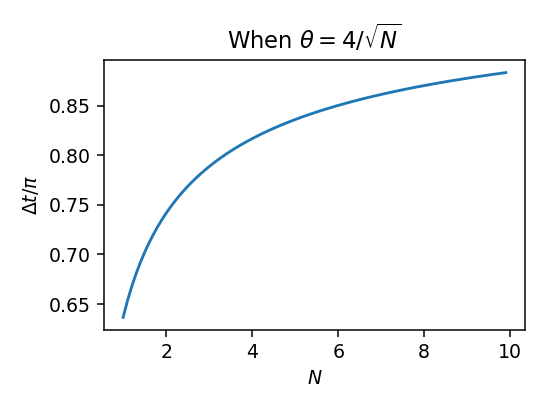

In [10]:
N_list = np.arange(1, 10, 0.1)
Dt_list = 2 * np.arcsin(np.sqrt(N_list / 2 * (1 - np.cos(2 / np.sqrt(N_list))))) / np.pi
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(N_list, Dt_list)
ax.set_xlabel("$N$"); ax.set_ylabel("$\Delta t / \pi$")
ax.set_title(r"When $\theta = 4/\sqrt{N}$")
fig.tight_layout()

## 练习 6.11 (连续量子搜索的多重解)

:::{admonition} 练习 6.11

猜测一个 Hamiltonian 量，用以求解有 $M$ 个解的连续时间搜索问题。

:::

我们回顾到之前的 Hamiltonian 量是 $H = |x\rangle \langle x| + |\psi\rangle \langle\psi|$。之前讨论的 $|x\rangle$ 是单解态。但 $|x\rangle$ 也可以像上一节一样是多解态，即每个解 $|m\rangle$ 的总和 (不考虑归一化系数) $|x\rangle = \sum_m |m\rangle$。在这种情况下，如果量子仿真的每一步精度都足够高，那么 $O(\sqrt{N/M})$ 步可以完成一次解的搜索，但每次无法确定是其中哪一个解。

## 练习 6.12 (量子搜索的不同 Hamiltonian 量)

:::{admonition} 练习 6.12

设

$$
H = |x\rangle \langle\psi| + |\psi\rangle \langle x|
\tag{6.29}
$$

1. 给定按 Hamiltonian 量的 $H$ 演化，证明从状态 $|\psi\rangle$ 到状态 $|x\rangle$ 用 $O(1)$ 次旋转；
2. 说明如何进行 Hamiltonian 量 $H$ 的量子仿真，并确定以高概率得到该解该仿真技术需要的 orcale 调用次数。

:::

**第一问**

我们仿照这一节开头的讨论。将 $|x\rangle$ 与 $|y\rangle$ 作为基，表示 Hamiltonian 量 $H$。我们令 $|\psi\rangle = \alpha |x\rangle + \beta |y\rangle$，那么

$$
H = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \begin{bmatrix} \alpha & \beta \end{bmatrix} + \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 2 \alpha & \beta \\ \beta & 0 \end{bmatrix} = \alpha I + \beta X + \alpha Z
$$

因此，依据式 (4.8)，

$$
e^{-i H t} |\psi\rangle = e^{-i t \alpha} \big( \cos(t) |\psi\rangle - i \sin (t) (\beta X + \alpha Z) |\psi\rangle \big)
$$

我们已经知道 $(\beta X + \alpha Z) |\psi\rangle = |x\rangle$，因此

$$
e^{-i H t} |\psi\rangle = e^{-i t \alpha} \big( \cos(t) |\psi\rangle - i \sin (t) |x\rangle \big)
$$

为了让变换 $e^{-i H t}$ 保证将 $|\psi\rangle$ 变换到 $|x\rangle$，只要让 $\cos(t) = 0$ 即可。因此可以选用 $t = \pi/2$。

---

**第二问**

我们发现 $H = |x\rangle \langle\psi| + |\psi\rangle \langle x|$ 与 $H = |x\rangle \langle x| + |\psi\rangle \langle\psi|$，两者在 $e^{- i H t}$ 算符上唯二的区别在于常数相位与仿真时间间隔。这前者是不关键的；后者是在实际量子门路中可以调整的。因此，这两者在仿真实现上是等价的。